
# Decision Trees

## Objectives

After completing this notebook you will be able to:

*   Develop a classification model using Decision Tree Algorithm


In this exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.


Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


In [1]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.
</div>


Now, read the data using pandas dataframe:


In [3]:
my_data = pd.read_csv("../data/Lecture_5_drug200.csv", delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
my_data.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>


In [6]:
# write your code here
my_data.shape

(200, 6)

In [8]:
my_data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<details><summary>Click here for the solution</summary>

```python
my_data.shape

```

</details>


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [9]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [10]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We need to convert these features to numerical values using **label encoding** to convert the categorical variable into dummy/indicator variables.


In [11]:
X[:,2]

array(['HIGH', 'LOW', 'LOW', 'NORMAL', 'LOW', 'NORMAL', 'NORMAL', 'LOW',
       'NORMAL', 'LOW', 'LOW', 'HIGH', 'LOW', 'LOW', 'NORMAL', 'HIGH',
       'LOW', 'HIGH', 'LOW', 'HIGH', 'LOW', 'NORMAL', 'LOW', 'LOW', 'LOW',
       'HIGH', 'HIGH', 'NORMAL', 'LOW', 'LOW', 'NORMAL', 'HIGH', 'LOW',
       'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'LOW', 'NORMAL', 'NORMAL',
       'NORMAL', 'HIGH', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'HIGH',
       'LOW', 'NORMAL', 'LOW', 'HIGH', 'NORMAL', 'LOW', 'HIGH', 'HIGH',
       'LOW', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'LOW', 'HIGH', 'LOW',
       'LOW', 'HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH',
       'HIGH', 'NORMAL', 'NORMAL', 'NORMAL', 'HIGH', 'LOW', 'HIGH',
       'HIGH', 'HIGH', 'LOW', 'HIGH', 'NORMAL', 'LOW', 'HIGH', 'LOW',
       'HIGH', 'NORMAL', 'LOW', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH',
       'HIGH', 'LOW', 'LOW', 'LOW', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'LOW', 'NORMAL', 'HIGH', 'LOW', 'NORMAL', 'LOW', 'HIGH',
   

In [12]:
X[:,1]

array(['F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M',
       'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F',
       'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'M',
       'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F',
       'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F',
       'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M',
       'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F',
       'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M',
       'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M',
       'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F',
       'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F

In [13]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.


In [14]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [15]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [16]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.


In [21]:
# your code
X_trainset.shape

(140, 5)

<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

```

</details>


Print the shape of X_testset and y_testset. Ensure that the dimensions match.


In [22]:
# your code
X_testset.shape


(60, 5)

<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

```

</details>


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [ ]:
drugTree = tree.DecisionTreeClassifier()
drugTree # it shows the default parameters

In [23]:
drugTree = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [24]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
X_trainset.shape

(140, 5)

In [26]:
X_trainset[X_trainset[:, 4]<=14.615].shape

(71, 5)

In [27]:
y_trainset.value_counts()

drugY    69
drugX    33
drugA    16
drugC    11
drugB    11
Name: Drug, dtype: int64

In [28]:
my_data[my_data["Na_to_K"]<=14.615].shape

(108, 6)

In [29]:
my_data.shape

(200, 6)

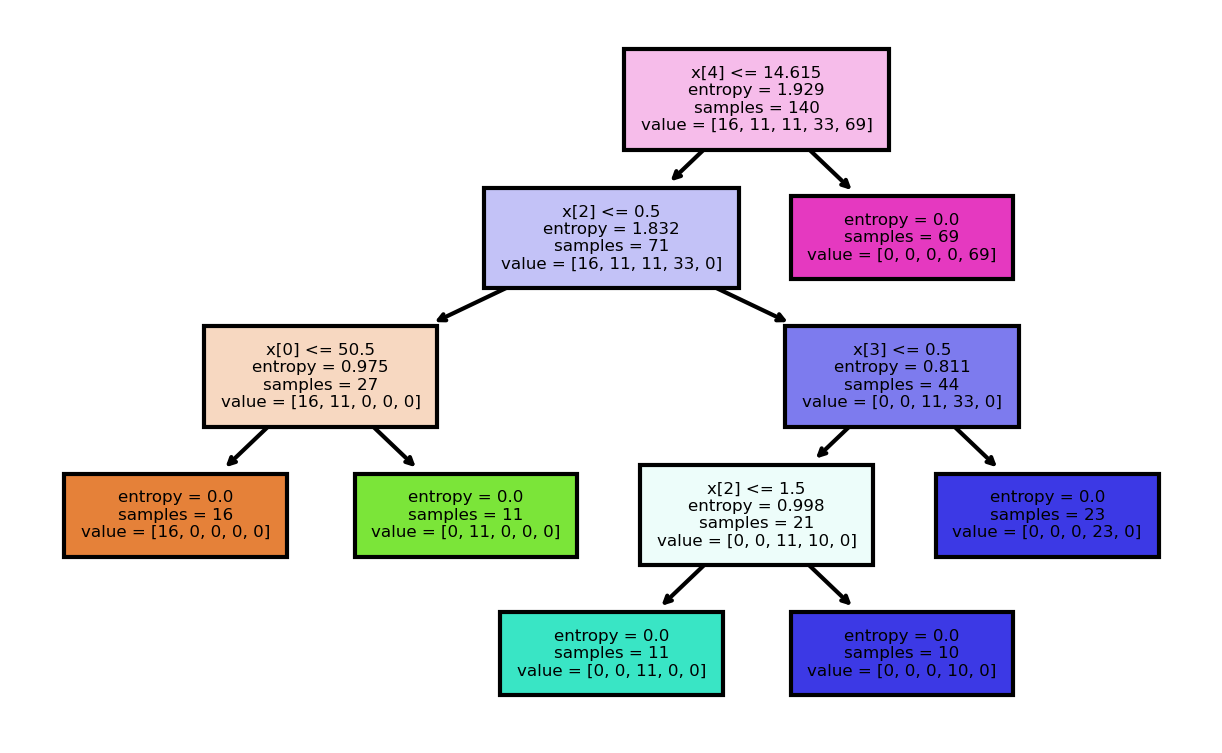

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,3), dpi=300)
tree.plot_tree(drugTree, filled = True, fontsize = 4)
#plt.figure(figsize=(20,20))
plt.show()

In [31]:
text_representation = tree.export_text(drugTree)
print(text_representation)

|--- feature_4 <= 14.62
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: drugB
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- class: drugX
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: drugX
|--- feature_4 >  14.62
|   |--- class: drugY



<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [32]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.


In [33]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [34]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

Let's plot confusion Matrix and understand it.

In [35]:
cm = metrics.confusion_matrix(y_testset, predTree)

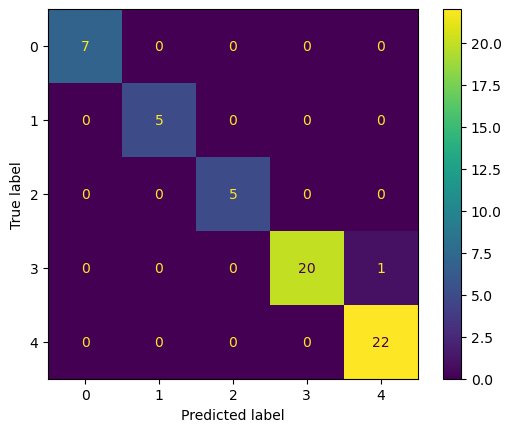

In [36]:
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

In [37]:
# total 60
y_testset.value_counts()

drugY    22
drugX    21
drugA     7
drugC     5
drugB     5
Name: Drug, dtype: int64

In [38]:
# computing accuracy
1-(1/60)

0.9833333333333333